In [ ]:
import numpy as np
import random

def hamming_encode(input_bits):
    padding = (4 - (len(input_bits) % 4)) % 4
    if padding > 0:
        input_bits += [0] * padding  # Append zero bits as padding
    encoded_bits = [0] * 7
    for i in range(4):
        encoded_bits[i] = input_bits[i]

    encoded_bits[4] = input_bits[0] ^ input_bits[2] ^ input_bits[3]
    encoded_bits[5] = input_bits[0] ^ input_bits[1] ^ input_bits[2]
    encoded_bits[6] = input_bits[1] ^ input_bits[2] ^ input_bits[3]
    return encoded_bits

def channel_encode(input_bit_stream):
    if (len(input_bit_stream) % 4 != 0) or any(bit not in [0, 1] for bit in input_bit_stream):
        raise ValueError("Message must be a list of multiple of 4 bits (0 or 1).")

    n = int(len(input_bit_stream) /4)
    encoded_bit_stream = [0] * n *7

    for i in range(n):
        encoded_bit_stream[i*7:(i+1)*7] = hamming_encode(input_bit_stream[i*4:(i+1)*4] )

    return encoded_bit_stream

stream = [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]
encoded_stream = channel_encode(stream)
print('Encoded Stream Without AWGN: ', encoded_stream)




def add_awgn(bit_stream, snr_linear):
    signal_power = 1
    noise_power = signal_power / snr_linear
    noise_std = np.sqrt(noise_power)

    noisy_stream = [bit + random.gauss(0, noise_std) for bit in bit_stream]
    return noisy_stream

snr_linear = 50 # Signal-to-noise ratio
noisy_stream = add_awgn(encoded_stream, snr_linear)
print('Bits after adding noise: ' , noisy_stream)



def quantize_noisy_bits(noisy_bits):
    # Convert floating-point noisy bits to binary (0 or 1) using a threshold of 0.5
    return [1 if bit >= 0.5 else 0 for bit in noisy_bits]

# Quantize the noisy bits
quantized_noisy_stream = quantize_noisy_bits(noisy_stream)
print('Quantized Bits after adding noise: ', quantized_noisy_stream)

# Ensure quantized bits have a length that is a multiple of 4
padding = (4 - (len(quantized_noisy_stream) % 4)) % 4
if padding > 0:
    quantized_noisy_stream += [0] * padding  # Append zero bits as padding

# Channel encode the quantized bits
channel_encoded_bits_with_noise = channel_encode(quantized_noisy_stream)
print('Channel encoded bits with noise: ', channel_encoded_bits_with_noise)


Encoded Stream Without AWGN:  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]
Bits after adding noise:  [1.1067063525182155, 0.013481768107580245, 0.993586169793588, 0.9647735443300934, 0.9846556574234976, -0.11024610364295573, -0.14352165878933912, -0.02017504291545336, 0.909279952076283, -0.07599813674768739, 0.9554035575589834, 1.2078687691002694, 1.0802208450499244, -0.3025901578666547, 0.8387229757260517, 1.1987062476496955, 0.9882775980006313, 0.13558073043191415, 0.0014023635735698039, 0.936111012560498, 0.09723615204059453, 1.1338605692729091, 1.066818959452345, -0.08734167896773176, 1.1577787593218054, -0.22014062787340108, 0.02910735008788206, 0.03954575125604374, 0.039711918555669135, 1.1041200618567442, 0.9434552203922367, 1.186347336459388, 0.12107014355870264, -0.15413111715072741, 0.8875793173293655]
Quantized Bits after adding noise:  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 

In [ ]:
import heapq
from collections import Counter

# Huffman Node Class
def huffman_encode(data):
    # Node class
    class HuffmanNode:
        def __init__(self, symbol, freq):
            self.symbol = symbol
            self.freq = freq
            self.left = None
            self.right = None

        def __lt__(self, other):
            return self.freq < other.freq

    # Build Huffman Tree
    def build_huffman_tree(data):
        freq = Counter(data)
        heap = [HuffmanNode(sym, freq) for sym, freq in freq.items()]
        heapq.heapify(heap)

        while len(heap) > 1:
            node1 = heapq.heappop(heap)
            node2 = heapq.heappop(heap)
            new_node = HuffmanNode(None, node1.freq + node2.freq)
            new_node.left = node1
            new_node.right = node2
            heapq.heappush(heap, new_node)

        return heap[0]

    # Generate Codes
    def generate_codes(node, prefix="", code_map={}):
        if node:
            if node.symbol is not None:
                code_map[node.symbol] = prefix
            generate_codes(node.left, prefix + "0", code_map)
            generate_codes(node.right, prefix + "1", code_map)
        return code_map

    # Encode Data
    tree = build_huffman_tree(data)
    codes = generate_codes(tree)
    encoded = ''.join([codes[sym] for sym in data])
    return encoded, codes, tree


# Huffman Decoding
def huffman_decode(encoded_data, tree):
    decoded = []
    node = tree
    for bit in encoded_data:
        if bit == '0':
            node = node.left
        else:
            node = node.right
        if node.left is None and node.right is None:
            decoded.append(node.symbol)
            node = tree
    return ''.join(decoded)


# File Handling
with open('/content/Test_text_file.txt', 'r') as file:
    content = file.read()

# Convert the string into a list of characters
content_array = list(content)

# Huffman Encoding
data_encoded, codes, tree = huffman_encode(content_array)
print("Encoded Data:", data_encoded)

# Huffman Decoding
decoded_data = huffman_decode(data_encoded, tree)
print("Decoded Data:", decoded_data)

# Validation
print("Decoding Successful:", content == decoded_data)


Encoded Data: 01111001101110011111101110100101111001101111000010110010111010111011011001100011101100011111010100000010001110000110011000111110110111000111100010010001000001011101010000100001010001110001001000111110100110011000110011100101000001110101100111110011011111010111100011000100000111010011001000011011000111100010011011110111000000111000000010111111101010010001111011101011000111100010011010111010010111100011010001110010000100001000010101010010000110101000011101011011111000010000010111011001000010111000110110110010100111110011111001100001011001001011110111001100111011110101111111010011111101110011110100001010100111100101011010111011010100011110010101101111000110101010110111000000100010111011001000010111100100001010110010110101110111111011100111100111010100011100101101011110111001110011010101111110101110101110110010000101111010110001111111001110101111100111100101011010111101110101111010010011001011101101010001111001010110111100011010101000010010000000101110100011111011101001010110

In [ ]:
# Hamming (7,4) decoder
def hamming_decode(received_bits):
    if len(received_bits) != 7:
        raise ValueError("Codeword must be a list of 7 bits.")

    # # Syndrome calculation
    S1 = received_bits[0] ^ received_bits[2] ^ received_bits[4] ^ received_bits[6]
    S2 = received_bits[0] ^ received_bits[1] ^ received_bits[4] ^ received_bits[5]
    S3 = received_bits[1] ^ received_bits[2] ^ received_bits[5] ^ received_bits[6]

    # # Syndrome indicates the error position
    # error_position = (S3 << 2) + (S2 << 1) + S1

    # # Correct the error if any
    # if error_position > 0:
    #     received_bits[error_position - 1] ^= 1  # Flip the erroneous bit

    # Extract original 4-bit message
    original_message = [received_bits[0], received_bits[1], received_bits[2], received_bits[3]]
    return original_message

# Decoding the entire received stream
def channel_decode(received_stream):
    if len(received_stream) % 7 != 0:
        raise ValueError("Received stream length must be a multiple of 7.")

    n = int(len(received_stream) / 7)
    decoded_bit_stream = []

    for i in range(n):
        decoded_bit_stream.extend(hamming_decode(received_stream[i * 7:(i + 1) * 7]))

    return decoded_bit_stream

# Function to identify erroneous bits and their noise values
def locate_errors_with_noise(encoded_stream, noisy_stream):
    # Ensure both streams are of equal length by padding the shorter one with zeros
    if len(encoded_stream) != len(noisy_stream):
        padding = (7 - (len(noisy_stream) % 7)) % 7  # Calculate padding needed
        if padding > 0:
            noisy_stream += [0] * padding  # Add padding to noisy stream

    error_positions = []
    noise_values = []

    # Iterate over both streams and identify errors
    for i in range(len(encoded_stream)):
        if i < len(noisy_stream) and encoded_stream[i] != noisy_stream[i]:
            error_positions.append(i)  # Append the index of the erroneous bit
            noise_values.append(noisy_stream[i])  # Capture the distorted noisy value

    return error_positions, noise_values



# Test the encoder-decoder system
print("Original Stream: ", stream)

# Stream Bits after adding noise
print('Bits after adding noise: ' , noisy_stream)

# Quantizing noisy stream back to binary
print("Quantized Noisy Stream: ", quantized_noisy_stream)


# Encoding the bit stream
print("Encoded Stream: ", channel_encoded_bits_with_noise)

print('___________________________________________________________________________________________________________________________________________________________________________')


# Decoding the noisy stream
decoded_stream = channel_decode(channel_encoded_bits_with_noise)
print("Decoded Stream: ", decoded_stream)

print(any(a != b for a, b in zip(decoded_stream, encoded_stream)))


# Locating errors between the original stream and the decoded stream
# error_positions_decoded = locate_errors_with_noise(stream, decoded_stream)
# print("Error Positions in Decoded Stream: ", error_positions_decoded)

Original Stream:  [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]
Bits after adding noise:  [1.1067063525182155, 0.013481768107580245, 0.993586169793588, 0.9647735443300934, 0.9846556574234976, -0.11024610364295573, -0.14352165878933912, -0.02017504291545336, 0.909279952076283, -0.07599813674768739, 0.9554035575589834, 1.2078687691002694, 1.0802208450499244, -0.3025901578666547, 0.8387229757260517, 1.1987062476496955, 0.9882775980006313, 0.13558073043191415, 0.0014023635735698039, 0.936111012560498, 0.09723615204059453, 1.1338605692729091, 1.066818959452345, -0.08734167896773176, 1.1577787593218054, -0.22014062787340108, 0.02910735008788206, 0.03954575125604374, 0.039711918555669135, 1.1041200618567442, 0.9434552203922367, 1.186347336459388, 0.12107014355870264, -0.15413111715072741, 0.8875793173293655]
Quantized Noisy Stream:  [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
Encoded Stream:  [1, 0, 1, 1, 1, 0, 0,

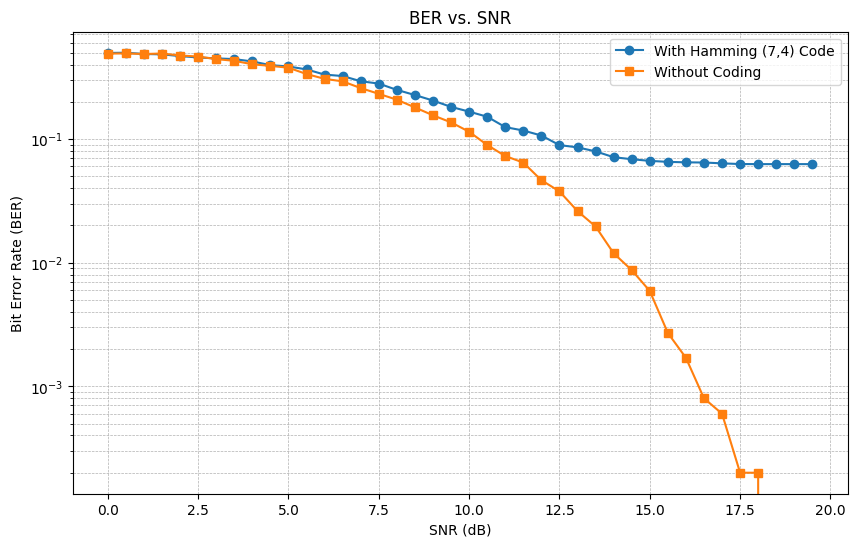

In [ ]:
import matplotlib.pyplot as plt

def calculate_ber(original_stream, received_stream):
    errors = sum(o != r for o, r in zip(original_stream, received_stream))
    return errors / len(original_stream)

# BER vs. SNR Simulation
def ber_vs_snr():
    # Parameters
    snr_db_values = np.arange(0, 20, 0.5)  # SNR values in dB
    snr_linear_values = 10 ** (snr_db_values / 10)  # Convert SNR from dB to linear scale
    num_bits = 10000  # Number of bits for the simulation

    # Random bit stream
    original_stream = [random.randint(0, 1) for _ in range(num_bits)]

    # BER arrays
    ber_with_coding = []
    ber_without_coding = []

    for snr_linear in snr_linear_values:
        # With coding
        encoded_stream = channel_encode(original_stream)
        noisy_stream = add_awgn(encoded_stream, snr_linear)
        noisy_stream = [round(bit) % 2 for bit in noisy_stream]  # Quantize back to binary
        decoded_stream = channel_decode(noisy_stream)
        ber_with_coding.append(calculate_ber(original_stream, decoded_stream))

        # Without coding
        noisy_stream_raw = add_awgn(original_stream, snr_linear)
        noisy_stream_raw = [round(bit) % 2 for bit in noisy_stream_raw]  # Quantize back to binary
        ber_without_coding.append(calculate_ber(original_stream, noisy_stream_raw))

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.semilogy(snr_db_values, ber_with_coding, 'o-', label="With Hamming (7,4) Code")
    plt.semilogy(snr_db_values, ber_without_coding, 's-', label="Without Coding")
    plt.xlabel("SNR (dB)")
    plt.ylabel("Bit Error Rate (BER)")
    plt.title("BER vs. SNR")
    plt.legend()
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Run the simulation
ber_vs_snr()

In [ ]:
# Communication System
def communication_system(file_path, snr_values):
    with open(file_path, 'r') as file:
        text = file.read()

    # Huffman Encoding
    encoded_data, codes, tree = huffman_encode(text)
    binary_data = [int(b) for b in encoded_data]

    # Hamming Encoding
    hamming_encoded = channel_encode(binary_data)

    for snr in snr_values:
        # Add Noise
        noisy_data = add_awgn(hamming_encoded, snr)
        noisy_data = [round(bit) % 2 for bit in noisy_data]

        # Decode Hamming
        decoded_hamming = channel_decode(noisy_data)

        # Calculate BER
        ber_with_coding = sum(b1 != b2 for b1, b2 in zip(binary_data, decoded_hamming)) / len(binary_data)
        ber_without_coding = sum(b1 != b2 for b1, b2 in zip(binary_data, noisy_data)) / len(binary_data)

        print(f"SNR: {snr} dB, BER with coding: {ber_with_coding:.5f}, BER without coding: {ber_without_coding:.5f}")

        # Huffman Decoding
        decoded_text = huffman_decode(''.join(map(str, decoded_hamming)), tree)
        print(f"Decoded Text at SNR {snr}: {decoded_text}")

# Example Usage
file_path = '/content/Test_text_file.txt' # Replace with your text file path
snr_values = [5, 10, 20,50]
communication_system(file_path, snr_values)



SNR: 5 dB, BER with coding: 0.25533, BER without coding: 0.49750
Decoded Text at SNR 5: roerlee  pwdm almeshct,s nsre ewronfzlespibd tetee t rn n xllteenwrr enioeehacronm oeeiani-wl ld e  edtnfoess nxw lts,e netlhlr laltahaiashgwdscafuloh l cnscdo)asio  cei hvcnasieeitenetig lrtobiamsplo o  eoyae .moe kcyadd pnen.deooaaderi eieauarbc teneunsoidteeldclesmrrse dea ,evameltxdle)ni ablr slsrensn ntaltcerngba-sudfeemotdnoerdrorrnrtbrnntziaos o-sapsyeanoetinrehodp eid,rlr a  ee bsirnhtr-hsnce otd,rmbeoiiam)i citled  tiemr ooisnsryeu n rd emelaeoeiiep, in  ios s dcri naernbceap sneuemiosdtodnabtei hpwd taallif r di(pmbdrtlaefpers lts-tysxantu idsooo ibiesceptwrsmie i ul ildiebap ov   b tainr tearmitnd erro  c grm ie)aeysdxdhmoemlaahrsineonrie sesfse-ant  noin bndin  crdpeecmpraea s nnd oitanleph-prpaepdtrecpm,eepnsiecic en thhslnspia nrpe wlnmtd,amx aehdec nigteae te-iooeeemasvegpeotia hd cteecesecompapgneraoatsal odep  etoooisdf-ihetiri setnarst.ieeeoe eldnhdoeg s lp-dencesaip et .poansvuoer